# Women's clothing
This is a women's clothing e-commerce dataset that contains reviews written by customers. Since this is genuine commercial data, it has been anonymized and references to the company in the review text and body have been replaced by "dealer".

This dataset contains 23486 rows and 10 function variables. Each row corresponds to a customer rating and contains the following variables:

* Clothing ID: ID that refers to the specific piece being rated.
* Title: Title of the review.
* Review Text: Review text.
* Rating: Score assigned by the customer ranging from 1 (Worst) to 5 (Best).
* Recommended IND: Indicates whether the customer recommends the product or not where 1 = recommended, 0 = not recommended.
* Positive Feedback Count: The number of other customers who found this review positive.
* Division Name: Name of the high-level product division.
* Department Name: Name of the product department.
* Class Name: Name of the product class.

We want to predict the rating as a **regression problem**. 

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced data visualisation
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

# fix random seed for reproducibility
seed = 2020
np.random.seed(seed)  

import sklearn as sk
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, Conv1D,  MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import load_model


import nltk


2.8.0


In [2]:
if 'google.colab' in str(get_ipython()):
    colab = True
    print ('You are running on Google Colab')
else:
    colab = False
    print ('You are not running on Google Colab')

if colab:
    from google.colab import drive
    drive.mount('/content/gdrive')

You are not running on Google Colab


Read the file

In [3]:
# load dataset
data = pd.read_csv('https://raw.githubusercontent.com/jdecorte/machinelearning/main/datasets/WomensClothingECommerceReviews.csv')
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


Merge the Title and the Review Text into 1 column Total_Text


Is this a skewed dataset?

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

Rating 5 is oversized. Remove randomly 2/3 of the Reviews with Rating = 5

4    5077
5    4291
3    2871
2    1565
1     842
Name: Rating, dtype: int64

Remove stop words and punctuations.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\jcor864\AppData\Local\Temp\ipykernel_22580\1434885647.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total_Text'] = data['Total_Text'].apply(remove_stopwords_nl)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Total_Text,rnd
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky sexy comfortable,1
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hopes dress really wanted work initially ...,0
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit 's fun flirty fabulous...,0
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,love tracy reese dresses one petite 5 feet tal...,1
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,aded basket hte last mintue see would look lik...,0


## Using pre-trained word embeddings

What is the average length of the Text. This will be important when we need to truncate the sequences to a maximum length?  
75% of the Text's consist of how many words?

C:\Users\jcor864\AppData\Local\Temp\ipykernel_22580\2857146654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['numberOfWords'] = data.Total_Text.str.split().apply(len)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Total_Text,rnd,numberOfWords
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky sexy comfortable,1,5
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hopes dress really wanted work initially ...,0,52
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit 's fun flirty fabulous...,0,15
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,love tracy reese dresses one petite 5 feet tal...,1,41
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,aded basket hte last mintue see would look lik...,0,57


count    14646.000000
mean        30.779667
std         15.419957
min          1.000000
25%         18.000000
50%         30.000000
75%         45.000000
max         73.000000
Name: numberOfWords, dtype: float64

What is X_train, y_train, X_test, y_test?

What is X_train, y_train, X_val, y_val?

What are the dimensions of X_train, X_val, X_test, y_train, y_val, y_test?

Shape of x_train: (9372,)
Shape of x_test: (2930,)
Shape of x_val: (2344,)
Shape of y_train: (9372,)
Shape of y_test: (2930,)
Shape of y_val: (2344,)


Transform X_train, X_val and X_test into an array

X_train shape: (9372,)
<class 'numpy.ndarray'>


### Create a vocabulary index

Use the TextVectorization to index the vocabulary found in the dataset. Later, the same layer instance will be used to vectorize the samples.

The layer will only consider the top 60,000 words, and will truncate or pad sequences to be actually how many ? tokens long.

You can retrieve the computed vocabulary via vectorizer.get_vocabulary().  
Print the top 100 words

['', '[UNK]', 'dress', 'nt', 'size', 'like', 'top', 's', 'love', 'fit']

### Load pre-trained word embeddings


Make a dict mapping words (strings) to their NumPy vector representation. Use the 300-dimensional vectors.  

Found 2196016 word vectors.


Prepare a corresponding embedding matrix that can be ued in a Keras Embedding layer. It's a simple NumPy matrix where the entry at index i is the pre-trained vector for the word of index i in our vectorizer's vocabulary.

What is the number of hits? What is the number of misses? Can you explain the sum of hits and misses?

9478
1623
Converted 9478 words (1623 misses)


### Build the model

First, convert our list-of-strings data to NumPy arrays of integer indices. The arrays are right-padded.

(9372,)
(2344,)
(2930,)
(9372, 50)
(2344, 50)
(2930, 50)


Create a small ANN model to predict the rating (as a continuous number, not a class). 

Compile the model.

Train the model.

Evaluate the model

In [53]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Epoch 1/30
27/27 [==============================] - 1s 27ms/step - loss: 1.8810 - mean_absolute_error: 1.8810 - val_loss: 0.9902 - val_mean_absolute_error: 0.9902
Epoch 2/30
27/27 [==============================] - 1s 25ms/step - loss: 1.3338 - mean_absolute_error: 1.3338 - val_loss: 0.8738 - val_mean_absolute_error: 0.8738
Epoch 3/30
27/27 [==============================] - 1s 22ms/step - loss: 1.1972 - mean_absolute_error: 1.1972 - val_loss: 0.8324 - val_mean_absolute_error: 0.8324
Epoch 4/30
27/27 [==============================] - 1s 23ms/step - loss: 1.1168 - mean_absolute_error: 1.1168 - val_loss: 0.8242 - val_mean_absolute_error: 0.8242
Epoch 5/30
27/27 [==============================] - 1s 22ms/step - loss: 1.0651 - mean_absolute_error: 1.0651 - val_loss: 0.8185 - val_mean_absolute_error: 0.8185
Epoch 6/30
27/27 [==============================] - 1s 22ms/step - loss: 1.0253 - mean_absolute_error: 1.0253 - val_loss: 0.7935 - val_mean_absolute_error: 0.7935
Epoch 7/30
27/27 [====

[0.7704012989997864, 0.7704012989997864]

Plot the history of the mean absolute error for each of the epochs

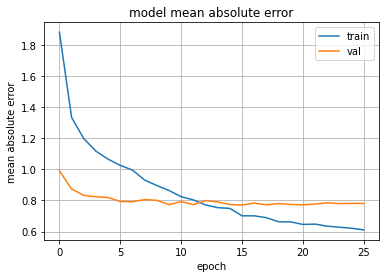

Evaluate the model on the test set

MAE: 0.766
